In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("CSWS_Population.csv")

In [4]:
data.head()

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
0,Aruba,ABW,1960,65.662,27637.0,26574.0,NaN,54211.0
1,Aruba,ABW,1961,66.074,28254.0,27184.0,NaN,55438.0
2,Aruba,ABW,1962,66.444,28655.0,27570.0,NaN,56225.0
3,Aruba,ABW,1963,66.787,28907.0,27788.0,NaN,56695.0
4,Aruba,ABW,1964,67.113,29094.0,27938.0,NaN,57032.0


In [5]:
vietnam = data[data['country'] == 'Vietnam']

In [6]:
vietnam.head()

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
14790,Vietnam,VNM,1960,59.041,16554502.0,16116127.0,NaN,32670629.0
14791,Vietnam,VNM,1961,59.722,17057908.0,16608864.0,NaN,33666772.0
14792,Vietnam,VNM,1962,60.391,17572019.0,17112146.0,NaN,34684165.0
14793,Vietnam,VNM,1963,61.024,18096738.0,17625353.0,NaN,35722091.0
14794,Vietnam,VNM,1964,61.585,18632569.0,18148416.0,NaN,36780985.0


In [7]:
vietnam.describe()

,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
count,58.000000,57.000000,5.800000e+01,5.800000e+01,33.000000,5.800000e+01
mean,1988.500000,68.524140,3.303913e+07,3.210318e+07,791.128894,6.514230e+07
std,16.886879,5.850385,9.814209e+06,9.601228e+06,694.314097,1.941506e+07
min,1960.000000,58.835000,1.655450e+07,1.611613e+07,94.271269,3.267063e+07
25%,1974.250000,61.968000,2.437477e+07,2.355390e+07,322.857048,4.792868e+07
50%,1988.500000,69.940000,3.353201e+07,3.250354e+07,427.838026,6.603556e+07
75%,2002.750000,73.695000,4.189915e+07,4.065072e+07,1210.691110,8.254987e+07
max,2017.000000,76.253000,4.826236e+07,4.727844e+07,2343.124575,9.554080e+07


### Visualize data

#### GDP Per Capital over Year

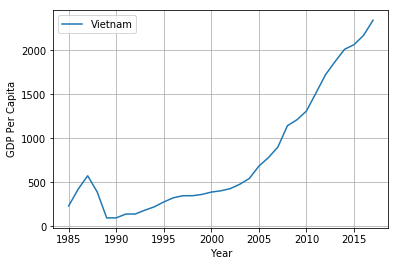

In [8]:
plt.plot(vietnam['year'], vietnam['gdpPerCapita'])
plt.legend(['Vietnam'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid()
plt.show()

#### GDP Life Expectancy over Year

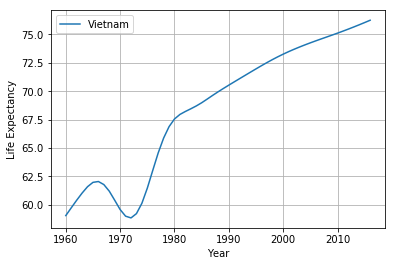

In [9]:
plt.plot(vietnam['year'], vietnam['lifeExpectancy'])
plt.legend(['Vietnam'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()

#### Population over Year

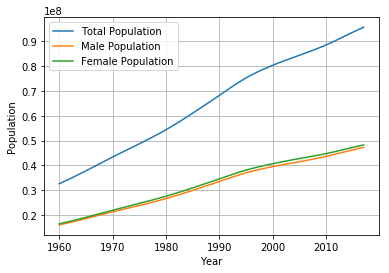

In [10]:
plt.plot(vietnam['year'], vietnam['population'])
plt.plot(vietnam['year'], vietnam['populationMale'])
plt.plot(vietnam['year'], vietnam['populationFemale'])
plt.legend(['Total Population', 'Male Population', 'Female Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()
plt.show()

### Train and Predict Population

#### Train and Predict GDP

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [12]:
lr_life = LinearRegression()
pr_gdp = LinearRegression()
lr_population = LinearRegression()

In [13]:
poly_reg = PolynomialFeatures(degree = 10)

In [14]:
from_1985_to_2007 = (vietnam['year'] >= 1985) & (vietnam['year'] <= 2007)

In [15]:
X_train_gdp = vietnam[from_1985_to_2007][['year']]

In [16]:
X_train_gdp_poly = poly_reg.fit_transform(X_train_gdp)

In [17]:
y_train_gdp = vietnam[from_1985_to_2007]['gdpPerCapita']

In [18]:
pr_gdp.fit(X_train_gdp_poly, y_train_gdp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
predicted_train_gdp = pr_gdp.predict(X_train_gdp_poly)

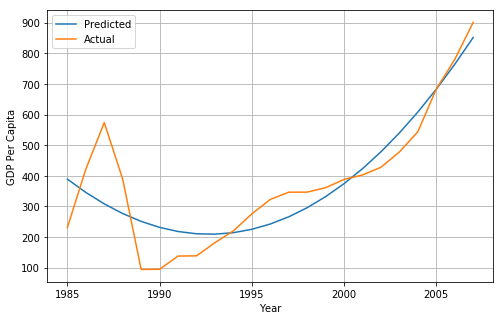

In [20]:
plt.figure(figsize=(8,5))
plt.plot(X_train_gdp, predicted_train_gdp)
plt.plot(X_train_gdp, y_train_gdp)
plt.legend(['Predicted', 'Actual'])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid()
plt.show()

In [21]:
X_train_life = vietnam[from_1985_to_2007][['year']]
y_train_life = vietnam[from_1985_to_2007]['lifeExpectancy']

lr_life.fit(X_train_life, y_train_life)

predicted_life = lr_life.predict(X_train_life)

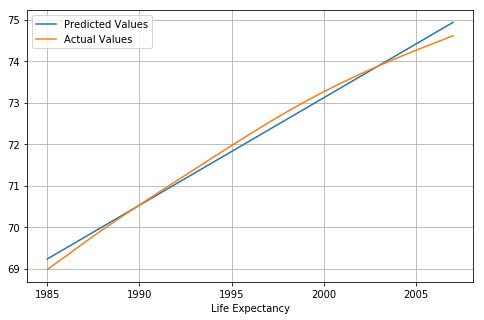

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(X_train_life, predicted_life)
plt.plot(X_train_life, y_train_life)
plt.legend(['Predicted Values', 'Actual Values'])
plt.xlabel("Year")
plt.xlabel("Life Expectancy")
plt.grid()
plt.show()

In [23]:
population_features = ['year', 'gdpPerCapita', 'lifeExpectancy']
X_train_population = vietnam[from_1985_to_2007][population_features]
y_train_population = vietnam[from_1985_to_2007]['population']

lr_population.fit(X_train_population, y_train_population)

predicted_population = lr_population.predict(X_train_population)

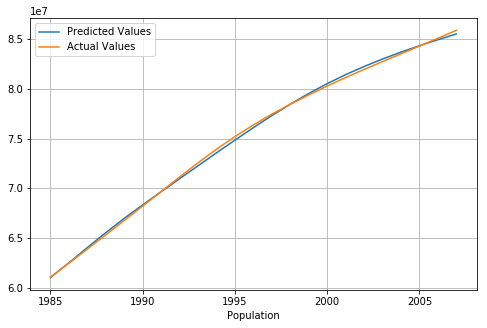

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(X_train_population['year'], predicted_population)
plt.plot(X_train_population['year'], y_train_population)
plt.legend(['Predicted Values', 'Actual Values'])
plt.xlabel("Year")
plt.xlabel("Population")
plt.grid()
plt.show()

### Prediction for 2016

In [25]:
target_year = 2016

poly_target_year = poly_reg.fit_transform([[target_year]])
print(poly_target_year)
predicted_gdp = pr_gdp.predict(poly_target_year)
predicted_life = lr_life.predict([[target_year]])

predicted_population = lr_population.predict([[target_year, predicted_gdp, predicted_life]])

[[1.00000000e+00 2.01600000e+03 4.06425600e+06 8.19354010e+09
  1.65181768e+13 3.33006445e+16 6.71340993e+19 1.35342344e+23
  2.72850166e+26 5.50065934e+29 1.10893292e+33]]


#### Show result

In [26]:
vn_2016 = vietnam[vietnam['year'] == 2016]
vn_2016

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
14846,Vietnam,VNM,2016,76.253,47780199.0,46788873.0,2170.648054,94569072.0


In [27]:
vn_2016[['gdpPerCapita', 'lifeExpectancy', 'population']].values[0]

array([2.17064805e+03, 7.62530000e+01, 9.45690720e+07])

In [28]:
predicted_gdp[0]

1943.5228421465727

In [29]:
pd.DataFrame(index=['GDP', 'Life Expectancy', 'Population'], 
             data={
                 'Predicted Values': [predicted_gdp[0], predicted_life[0], predicted_population[0]],
                 'True Values': vn_2016[['gdpPerCapita', 'lifeExpectancy', 'population']].values[0]
                  },
            dtype=np.int64)

,Predicted Values,True Values
GDP,1943,2170
Life Expectancy,77,76
Population,97650189,94569072


### Prediction from 2007 to 2016

In [44]:
from_2007_to_2017 = [[i] for i in range(2007, 2017)]

In [45]:
data_from_2007_to_2017 = (vietnam['year'] >= 2007) & (vietnam['year'] < 2017)
vietnam[data_from_2007_to_2017]

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population
14837,Vietnam,VNM,2007,74.609,43554275.0,42335315.0,901.324893,85889590.0
14838,Vietnam,VNM,2008,74.777,43944331.0,42763470.0,1143.268575,86707801.0
14839,Vietnam,VNM,2009,74.946,44353480.0,43211927.0,1210.691110,87565407.0
14840,Vietnam,VNM,2010,75.117,44789445.0,43683067.0,1310.370273,88472512.0
14841,Vietnam,VNM,2011,75.294,45256850.0,44179794.0,1515.479925,89436644.0
14842,Vietnam,VNM,2012,75.476,45752283.0,44699598.0,1722.683931,90451881.0
14843,Vietnam,VNM,2013,75.663,46265307.0,45232418.0,1871.325491,91497725.0
14844,Vietnam,VNM,2014,75.855,46780669.0,45764246.0,2012.046290,92544915.0
14845,Vietnam,VNM,2015,76.052,47287005.0,46284562.0,2065.169099,93571567.0
14846,Vietnam,VNM,2016,76.253,47780199.0,46788873.0,2170.648054,94569072.0


In [48]:
df_t01 = vietnam[data_from_2007_to_2017][['year', 'gdpPerCapita', 'lifeExpectancy']]
df_t01.head()

,year,gdpPerCapita,lifeExpectancy
14837,2007,901.324893,74.609
14838,2008,1143.268575,74.777
14839,2009,1210.691110,74.946
14840,2010,1310.370273,75.117
14841,2011,1515.479925,75.294


In [49]:
predicted_population_period = lr_population.predict(df_t01)

In [53]:
df_t01['predicted_population'] = predicted_population_period
df_t01['population'] = vietnam[data_from_2007_to_2017][['population']]

In [57]:
df_t01.tail()

,year,gdpPerCapita,lifeExpectancy,predicted_population,population
14842,2012,1722.683931,75.476,8.846564e+07,90451881.0
14843,2013,1871.325491,75.663,8.913976e+07,91497725.0
14844,2014,2012.046290,75.855,8.984577e+07,92544915.0
14845,2015,2065.169099,76.052,9.059349e+07,93571567.0
14846,2016,2170.648054,76.253,9.135950e+07,94569072.0


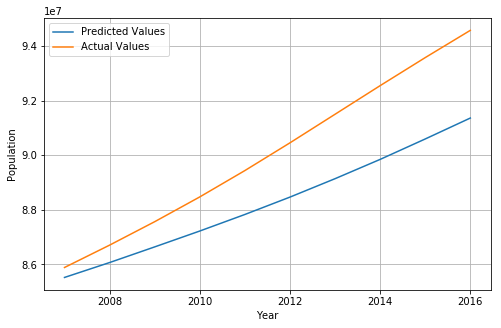

In [145]:
plt.figure(figsize=(8, 5))
plt.plot(vietnam[data_from_2007_to_2017]['year'], df_t01['predicted_population'])
plt.plot(vietnam[data_from_2007_to_2017]['year'], df_t01['population'])
plt.legend(['Predicted Values', 'Actual Values'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()
plt.show()

### Observation

From the above graph comparing the actual population vs predicted population for the period 2007 to 2016, we can see that Vietnam population grows faster than prediction.

That might be because there are other contributing factors to population growth other than GDP and Life Expectancy.

So I will look into new data - like fertility, mortality, ...

In [138]:
def normalize_worldbank_data(filename, value_name):
    df_t01 = pd.read_csv(filename, header=2)

    rng_years = [str(idx) for idx in range(1960, 2018)]
    selected_columns = ['Country Name', 'Country Code'] + rng_years
    
    df_t02 = df_t01[selected_columns]
    df_t03 = pd.melt(df_t02, id_vars=['Country Name', 'Country Code'], value_vars=rng_years, var_name='year', value_name=value_name)
    df_t03 = df_t03.rename(columns={'Country Name': 'country', 'Country Code': 'countryCode'})
    df_t03['year'] = df_t03['year'].astype('int64')
    return df_t03

In [139]:
df_t04 = normalize_worldbank_data("Fertility.csv", "fertility")
df_t04.shape

(15312, 4)

In [136]:
df_t05 = data.merge(df_t04, how='inner', on=['year', 'country', 'countryCode'])

In [142]:
df_t05.head()

,country,countryCode,year,lifeExpectancy,populationFemale,populationMale,gdpPerCapita,population,fertility
0,Aruba,ABW,1960,65.662,27637.0,26574.0,NaN,54211.0,4.820
1,Aruba,ABW,1961,66.074,28254.0,27184.0,NaN,55438.0,4.655
2,Aruba,ABW,1962,66.444,28655.0,27570.0,NaN,56225.0,4.471
3,Aruba,ABW,1963,66.787,28907.0,27788.0,NaN,56695.0,4.271
4,Aruba,ABW,1964,67.113,29094.0,27938.0,NaN,57032.0,4.059


In [143]:
vietnam = df_t05[df_t05['country'] == 'Vietnam']

#### Fertility over Year

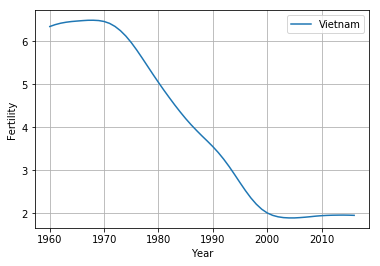

In [144]:
plt.plot(vietnam['year'], vietnam['fertility'])
plt.legend(['Vietnam'])
plt.xlabel('Year')
plt.ylabel('Fertility')
plt.grid()
plt.show()

#### Predict Fertility from 2007 -> 2016

In [155]:
pg_fer = LinearRegression()
pg_poly_fer = PolynomialFeatures(degree=10)

X_train_fer = vietnam[from_1985_to_2007][['year']]
X_train_fer_poly = pg_poly_fer.fit_transform(X_train_fer)
y_train_fer = vietnam[from_1985_to_2007]['fertility']
pg_fer.fit(X_train_fer_poly, y_train_fer)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Visualize how prediction performs for past values

In [ ]:
y_train_predicted = pg_fer.predict(X_train_fer_poly)

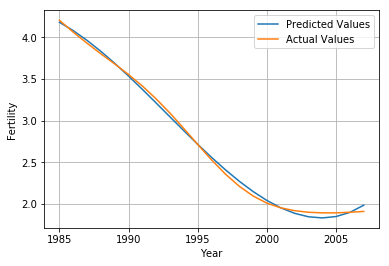

In [166]:
plt.plot(vietnam[from_1985_to_2007]['year'], y_train_predicted)
plt.plot(vietnam[from_1985_to_2007]['year'], y_train_fer)
plt.legend(['Predicted Values', 'Actual Values'])
plt.xlabel('Year')
plt.ylabel('Fertility')
plt.grid()
plt.show()

##### Visualize how prediction performs for the period 2007 -> 2016

In [156]:
X_test_fer = vietnam[data_from_2007_to_2017][['year']]
X_test_poly_fer = pg_poly_fer.fit_transform(X_test_fer)
predicted_fer = pg_fer.predict(X_test_poly_fer)

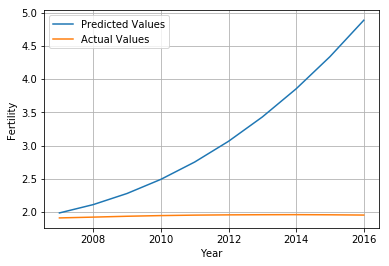

In [157]:
plt.plot(vietnam[data_from_2007_to_2017]['year'], predicted_fer)
plt.plot(vietnam[data_from_2007_to_2017]['year'], vietnam[data_from_2007_to_2017]['fertility'])
plt.legend(['Predicted Values', 'Actual Values'])
plt.xlabel('Year')
plt.ylabel('Fertility')
plt.grid()
plt.show()

##### Observation
Ouch, this is similar to the issue with Stock Prediction in the lab. It's because I assume that fertility somehow correlated to year as linear regression, but it's not. 

Let me check the corr between other data.

In [159]:
df_t06 = df_t05[['year', 'fertility', 'population', 'gdpPerCapita', 'lifeExpectancy']]

In [162]:
import seaborn as sns

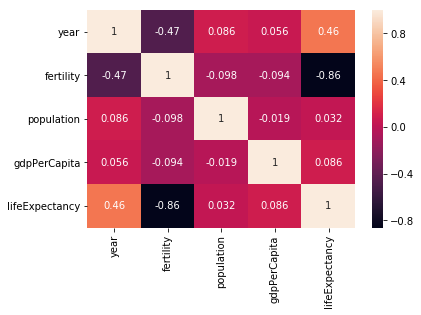

In [164]:
sns.heatmap(df_t06.corr(), annot=True)

I can see that there are some notable correlations here

* Life Expectancy improves over year. This makes sense. As the economic grows, people receive better healthcare, thus increasing Life Expectancy.
* Fertility decreases over year. This is because the gorvement encourages less birthrate. Also, young people tends to have less childrent to provide better education and life style.
* Fertility and Life Expectancy has negative correlation, as a result of the above.